In [142]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

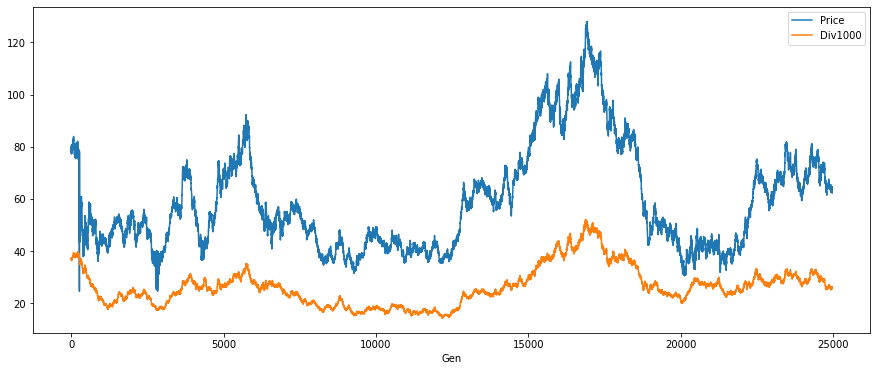

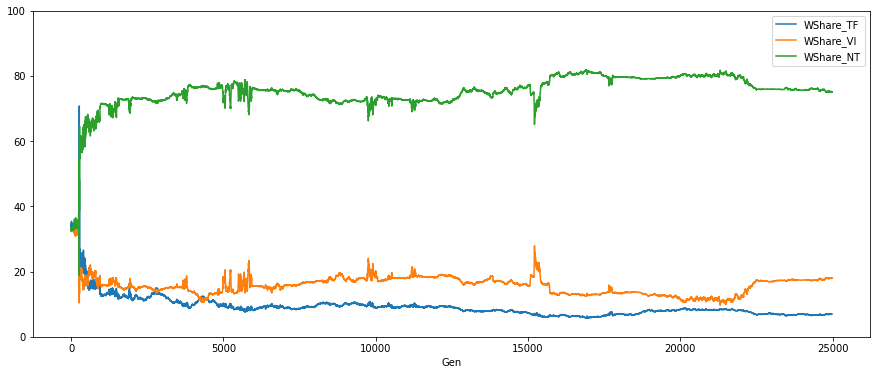

In [143]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.44692747385794684 0.12541950336199884 -0.011940508443557266
Annual mean returns  
[0.08628314613817467, 0.014867439938349884, -0.0006014210982088367]
Annual std returns
[0.1930584964790042, 0.11854169040550201, 0.050368131395053375]
T test for Rf = 0, VI vs TF
T test value VI-TF is 13.354338787428192
T test value VI-NT is -37.535522732089596
T test value TF-NT is -43.96000164160709
confidence intervals at 95%
[0.43392159702439675, 0.45993335069149693]
[0.11296949237117668, 0.137869514352821]
[-0.02434228855228713, 0.0004612716651725985]
Including r = 0.01 as risk free rate
[65.845452768894, 18.17044392621686, -3.4675180637254868]


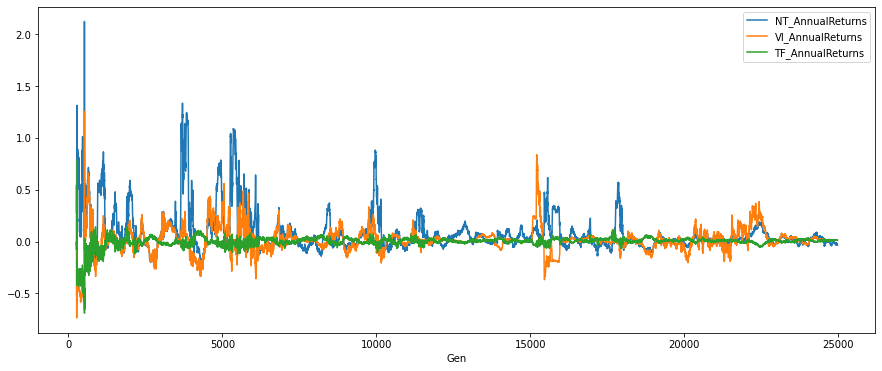

In [144]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

print('T test for Rf = 0, VI vs TF')
df['DiffAR_VI_TF'] = df['VI_AnnualReturns'] - df['TF_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['TF_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_TF'])
obs = len(df['DiffAR_VI_TF'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-TF is ' + str(t))

df['DiffAR_VI_NT'] = df['VI_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['VI_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_VI_NT'])
obs = len(df['DiffAR_VI_NT'])
t = (srNT - srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value VI-NT is ' + str(t))

df['DiffAR_TF_NT'] = df['TF_AnnualReturns'] - df['NT_AnnualReturns']
srNT = np.nanmean(df['TF_AnnualReturns'])
srTF = np.nanmean(df['NT_AnnualReturns'])
std_diff = np.nanstd(df['DiffAR_TF_NT'])
obs = len(df['DiffAR_TF_NT'])
t = (srNT -srTF ) / np.sqrt((std_diff ** 2 ) * (1/obs + 1/obs))
print('T test value TF-NT is ' + str(t))


print('confidence intervals at 95%')
T = len(df['VI_AnnualReturns'])

CI_Sharpe_NT = [SharpeNT - 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T),SharpeNT + 1.96 * np.sqrt((1 + 0.5 * SharpeNT**2)/T)]
print(CI_Sharpe_NT)
CI_Sharpe_VI = [SharpeVI - 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T),SharpeVI + 1.96 * np.sqrt((1 + 0.5 * SharpeVI**2)/T)]
print(CI_Sharpe_VI)
CI_Sharpe_TF = [SharpeTF - 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T),SharpeTF + 1.96 * np.sqrt((1 + 0.5 * SharpeTF**2)/T)]
print(CI_Sharpe_TF)

print('Including r = 0.01 as risk free rate')

TValueNT = (SharpeNT - 0.01) / np.sqrt((1 + 0.5 * SharpeNT**2)/T)
TValueVI = (SharpeVI - 0.01) / np.sqrt((1 + 0.5 * SharpeVI**2)/T)
TValueTF = (SharpeTF - 0.01) / np.sqrt((1 + 0.5 * SharpeTF**2)/T)
print([TValueNT,TValueVI,TValueTF])


df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



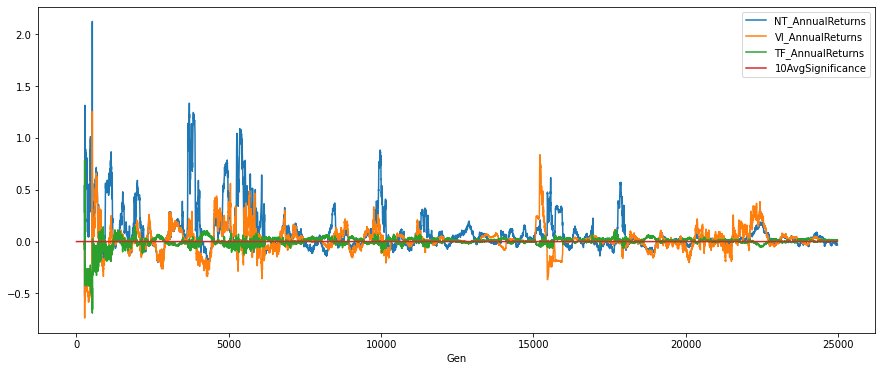

In [145]:
df['10AvgSignificance'] = 100000000 * df['AvgSignificance']
df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns", "10AvgSignificance"],
        kind="line", figsize=(15, 6))
plt.show()

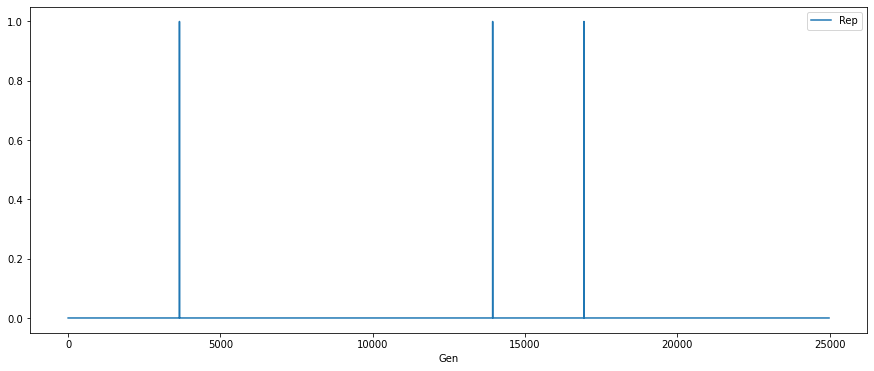

In [146]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

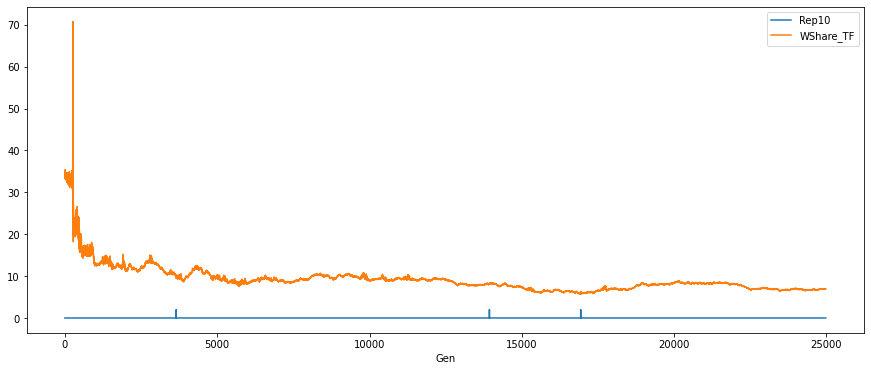

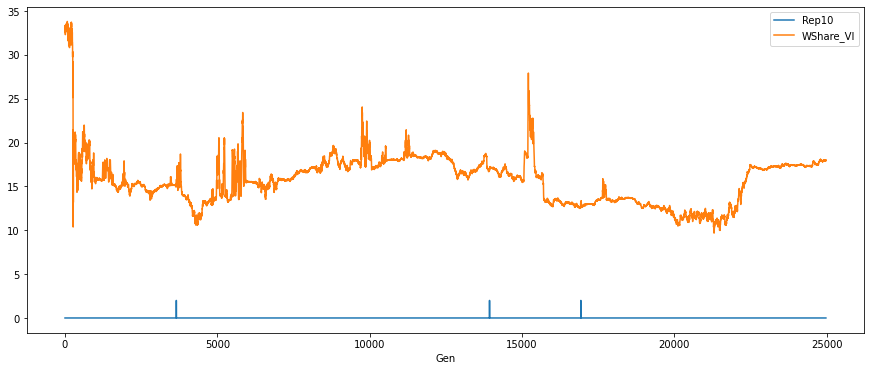

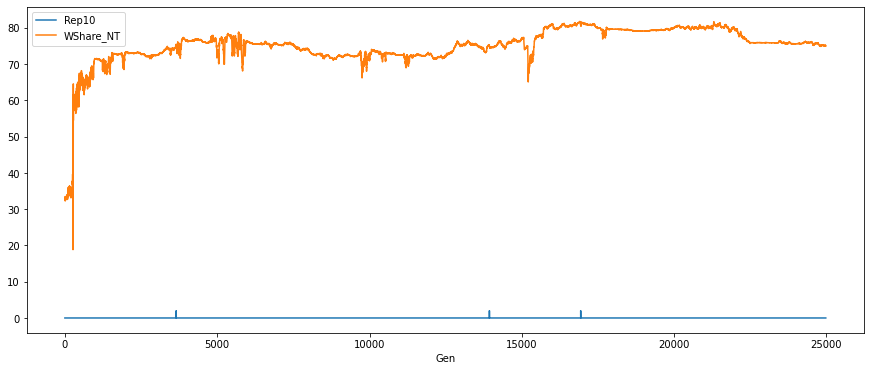

In [147]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [148]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

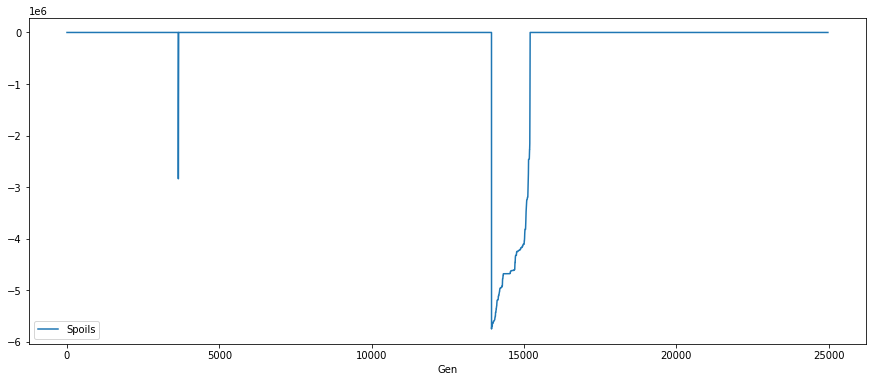

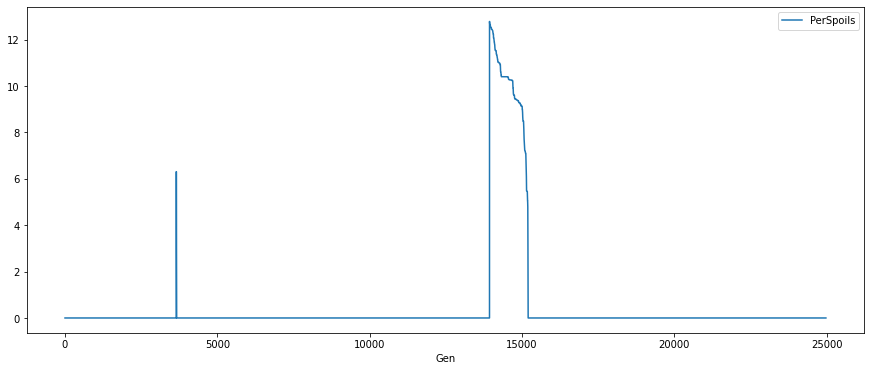

In [149]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

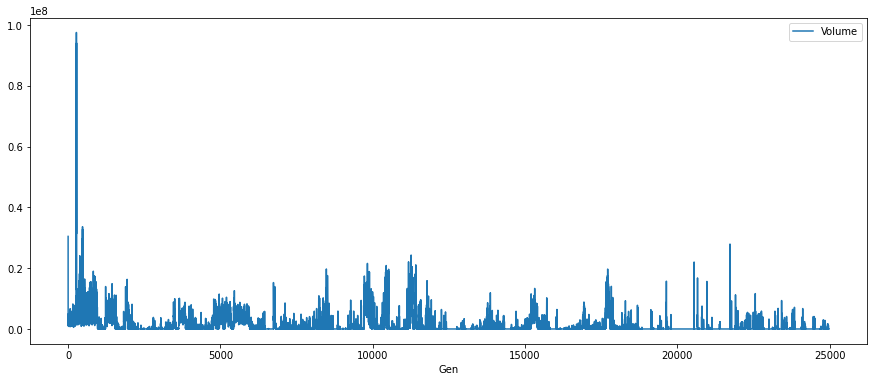

0        3.045816e+07
1        1.018679e+06
2        1.517141e+06
3        1.474374e+06
4        1.743858e+06
             ...     
24974    0.000000e+00
24975    0.000000e+00
24976    0.000000e+00
24977    0.000000e+00
24978    0.000000e+00
Name: Volume, Length: 24979, dtype: float64


In [150]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

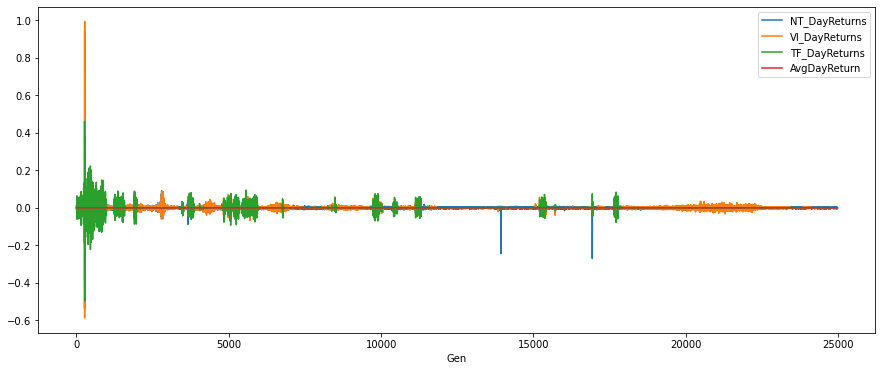

In [151]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

1.84984807525698e-17
98.78498108346491


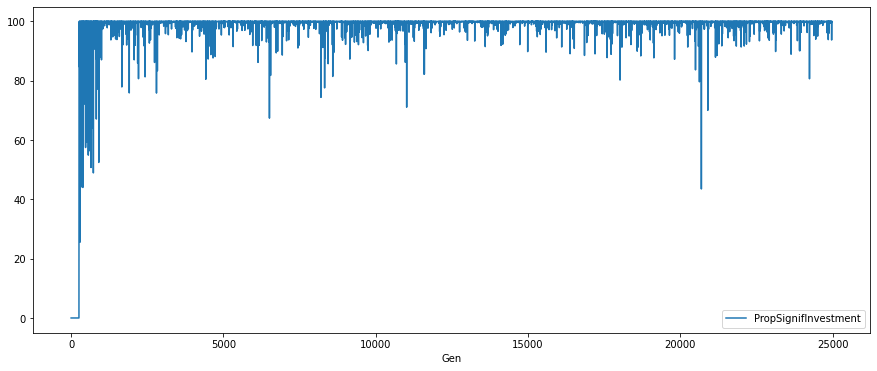

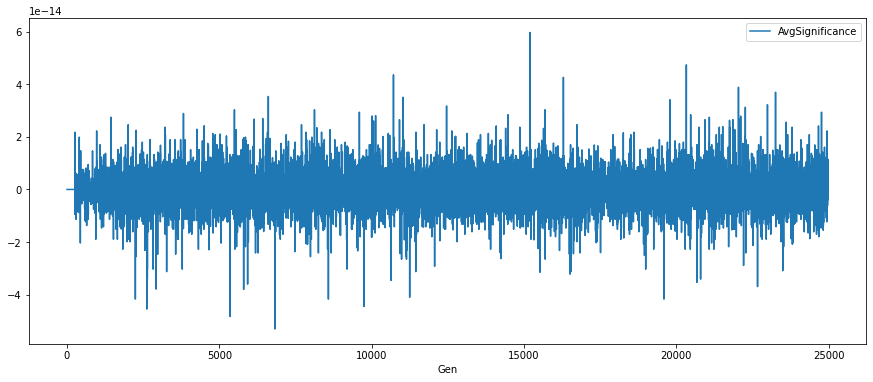

In [152]:
print(df['AvgSignificance'].mean())
print(df['PropSignifInvestment'].mean())
df.plot(x="Gen", y = ["PropSignifInvestment"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["AvgSignificance"],
        kind="line", figsize=(15, 6))
plt.show()

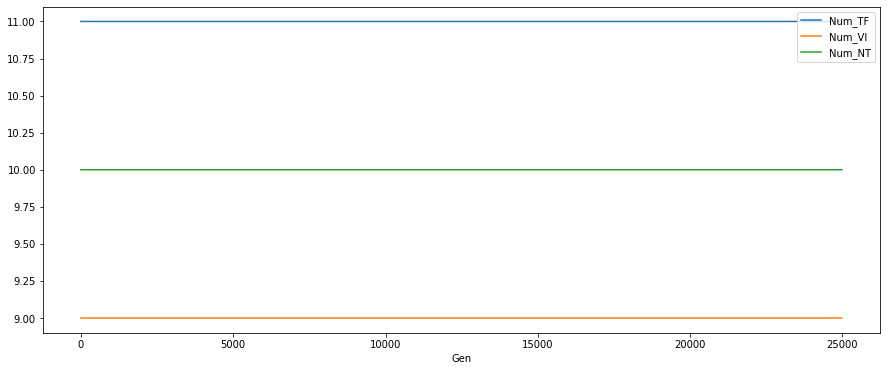

In [153]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


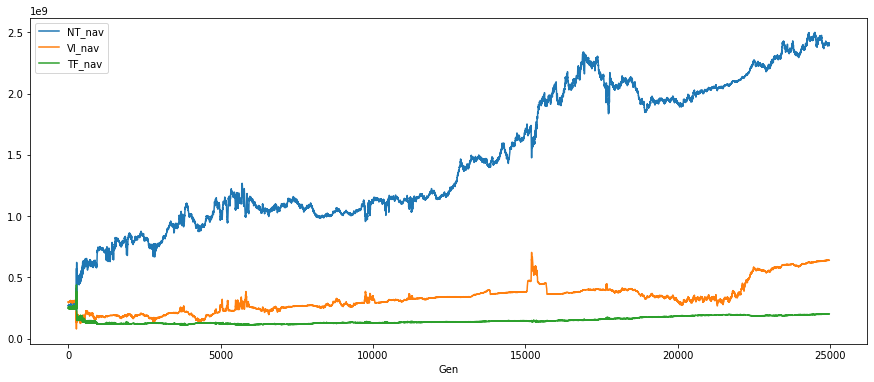

In [154]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


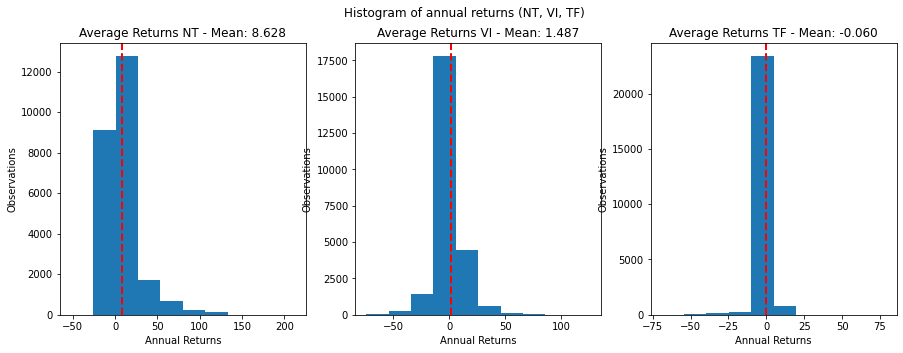

In [155]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [156]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.4298488007000602


In [157]:
''' Significance test '''

data = pd.DataFrame()
data['NT'] = df['NT_AnnualReturns'].iloc[-252*2:]
data['VI'] = df['VI_AnnualReturns'].iloc[-252*2:]
data['TF'] = df['TF_AnnualReturns'].iloc[-252*2:]

def Sharpe(arr):
    sharpe = np.nanmean(arr) / np.nanstd(arr)
    se = np.sqrt((1 + 0.5 * sharpe ** 2)/len(arr))
    result = [sharpe, se]
    return result

print('Full data Sharpe ')
print([Sharpe(df['NT_AnnualReturns']),Sharpe(df['VI_AnnualReturns']),Sharpe(df['TF_AnnualReturns'])])

print('Last 2Y Sharpe')
print(len(data['NT']))
print([Sharpe(data['NT']),Sharpe(data['VI']),Sharpe(data['TF'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-20:]

print('Last 20 days Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])

data = pd.DataFrame()
data['NT2'] = df['NT_AnnualReturns'].iloc[-252*20:]
data['VI2'] = df['VI_AnnualReturns'].iloc[-252*20:]
data['TF2'] = df['TF_AnnualReturns'].iloc[-252*20:]

print('Last 20Y Sharpe')
print(len(data['NT2']))
print([Sharpe(data['NT2']),Sharpe(data['VI2']),Sharpe(data['TF2'])])



Full data Sharpe 
[[0.44692747385794684, 0.0066356514456888255], [0.12541950336199884, 0.00635204642388886], [-0.011940508443557266, 0.006327438830984625]]
Last 2Y Sharpe
504
[[-0.33904240002423924, 0.04580572489925063], [4.492819030658603, 0.14835547869150575], [2.568113422265344, 0.0923417057705912]]
Last 20 days Sharpe
20
[[-6.641834210619293, 1.0737080804547483], [29.01082022628609, 4.592460370547279], [9.609891509869746, 1.5358223760535152]]
Last 20Y Sharpe
5040
[[0.5065341114050537, 0.014962177202154151], [0.40520000003790146, 0.01465268218590516], [0.3638028027423848, 0.014544514591102554]]


In [158]:
popsize = 5
import numpy as np
from scipy.special import stdtrit

generation = 100
returns_tracker = np.random.rand(generation,popsize)
# print(returns_tracker)

ReinvestmentRate = 1.2
returns_tracker[:,1] = -1 * returns_tracker[:,1]
# print(returns_tracker)
InvestmentHorizon = 5


def Investment(returns_tracker, InvestmentHorizon, generation):
    ReturnData = returns_tracker[generation-InvestmentHorizon:generation,:]
    InvestmentRatios = [np.nan] * popsize
    # print(ReturnData)
    # It correctly takes the last 5 points
    SharpeList = [0] * popsize

    TestThreshold = stdtrit(InvestmentHorizon, 0.95)
    TestValues1 = [0] * popsize

    for i in range(popsize):
        DataSlice = ReturnData[:,i]
        MeanReturns = np.nanmean(DataSlice)
        StdReturns = np.nanstd(DataSlice)
        if StdReturns != 0:
            Sharpe = MeanReturns / StdReturns
        else:
            Sharpe = np.nan

        SESharpe = np.sqrt(1 + 0.5 * Sharpe ** 2) / np.sqrt(InvestmentHorizon)
        SharpeList[i] = Sharpe
        DailyInterestRate = 0.01 / 252
        TValue = (Sharpe - DailyInterestRate) / SESharpe
        TestValues1[i] = TValue

        # Replacement by a continuous mechanism
    SumTValues = sum(TestValues1)
    countSignif = 0
    for i in range(popsize):
        InvestmentRatios[i] = TestValues1[i] / SumTValues
        if TestValues1[i] > TestThreshold:
            countSignif += 1

    return countSignif, InvestmentRatios

countSignif, InvestmentRatios = Investment(returns_tracker, 3, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 5, generation)
print([countSignif, InvestmentRatios])

countSignif, InvestmentRatios = Investment(returns_tracker, 50, generation)
print([countSignif, InvestmentRatios])

[0, [0.35761153053059364, -0.37958563452432953, 0.3184741874484308, 0.38363789194157516, 0.31986202460373]]
[4, [0.38980724828817015, -0.4302059271945012, 0.3150184687233024, 0.358681378058134, 0.3666988321248947]]
[4, [0.3287825619734723, -0.3479305161931267, 0.32462182298228903, 0.3527879665491084, 0.341738164688257]]
